In [91]:
#NumPy is a general-purpose array-processing package.
import numpy as np 
#Pandas allows us to analyze big data and make conclusions based on statistical theories.
import pandas as pd 
#Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
#It enables the drawing of matplotlib figures in the IPython environment.
%matplotlib inline

In [92]:
#To avoid encoding error, unicode_escape is used
df = pd.read_csv('D:\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv',encoding='unicode_escape')

In [93]:
#Provides the no.of rows and columns in the data
df.shape

(11251, 15)

In [94]:
#Shows top 5 rows of file
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [96]:
#Drop blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [98]:
#Checking null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [99]:
#drop null values
df.dropna(inplace=True)

In [100]:
df.shape

(11239, 13)

In [101]:
#Change data type
df['Amount'] = df['Amount'].astype('int')

In [102]:
df['Amount'].dtypes

dtype('int32')

In [103]:
#Returns description of the data in Dataframe (i.e count, mean, std, etc)
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [104]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

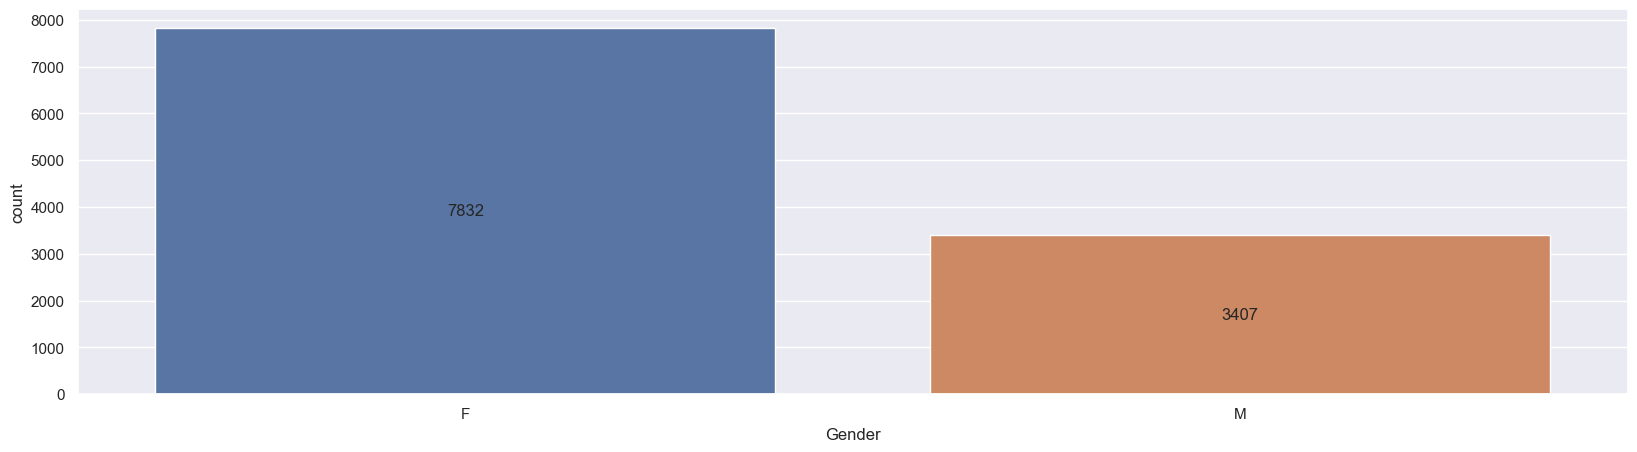

In [105]:
#To plot the count of Gender
ax = sns.countplot(x = 'Gender', data = df)

#To add data labels to the plot
for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

In [106]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


##### From above graphs, we can see that most of the buyers are females and even the purchasing power of females are greater than males

## Age

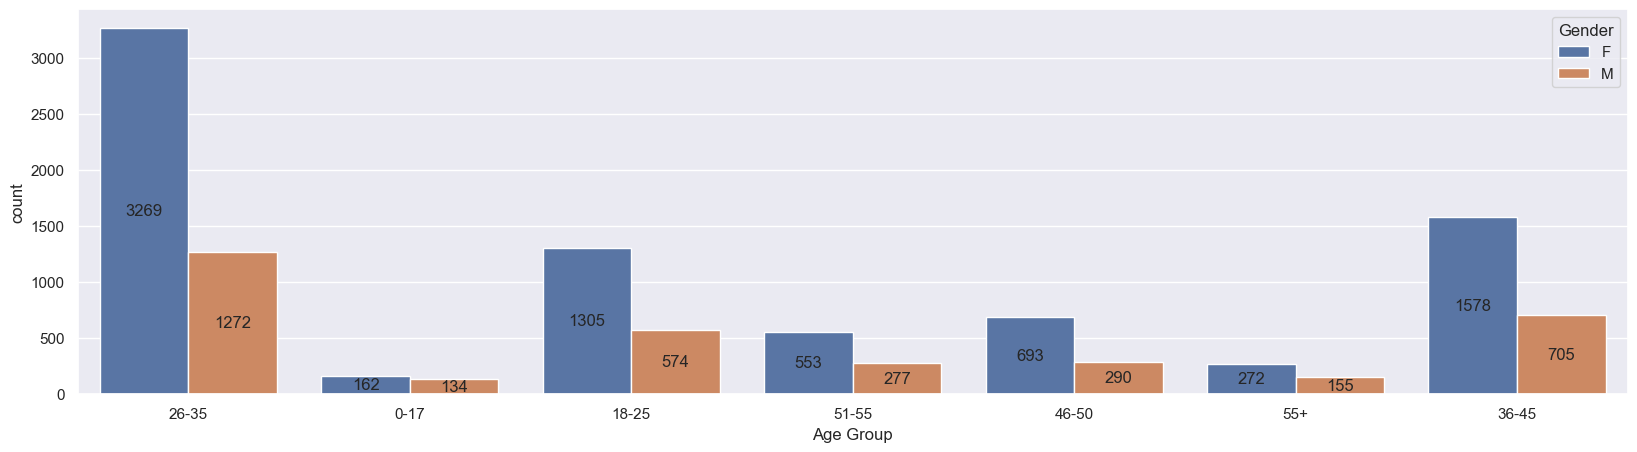

In [107]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

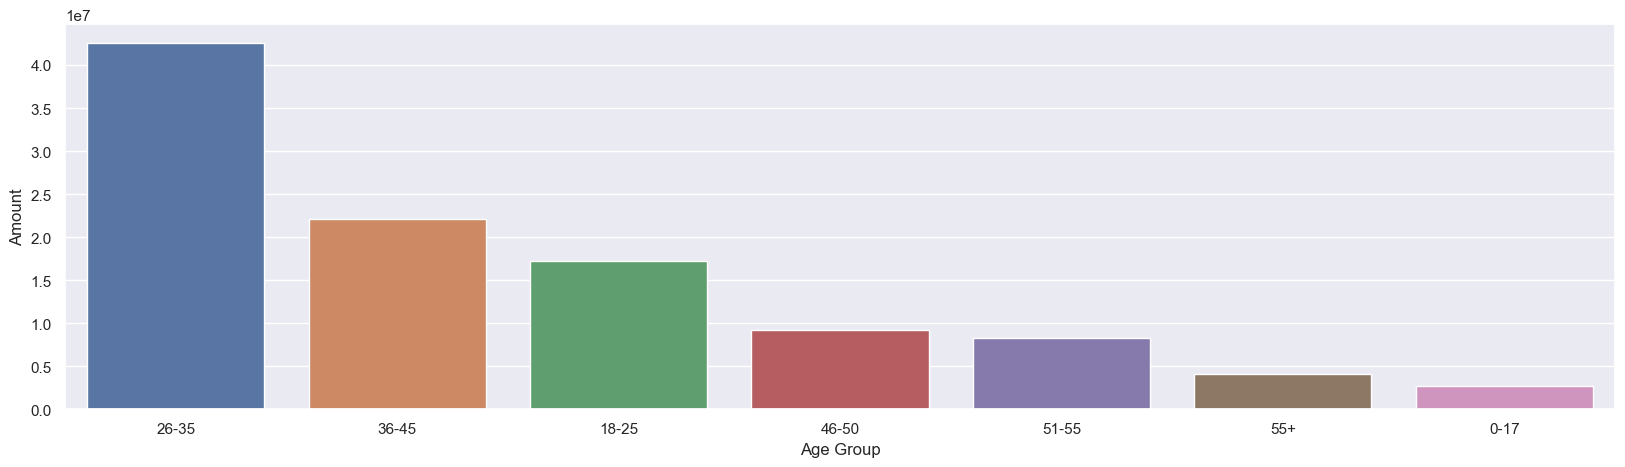

In [108]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

##### Most of the buyers are between age group 26 to 35 yrs females

## State

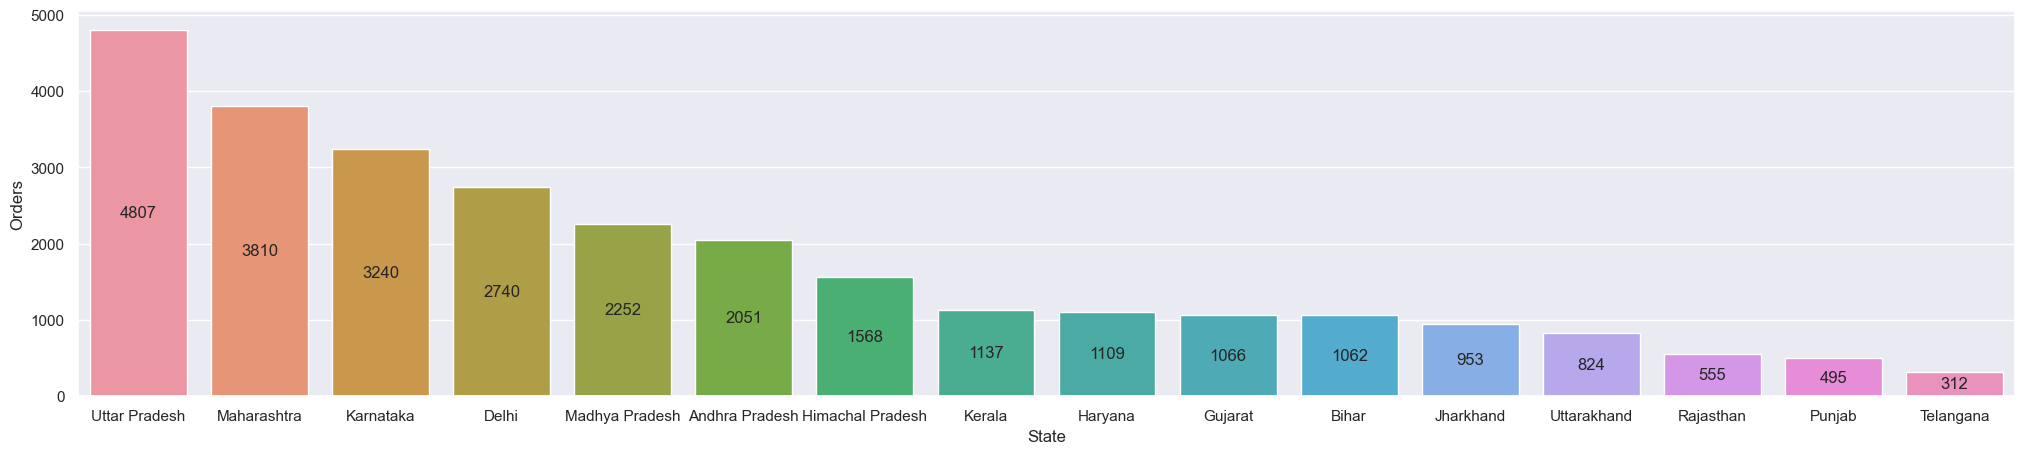

In [109]:
#Total number of orders state wise
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

#Setting the size of plot so that the data is visible properly
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'State', y = 'Orders', data = sales_state)

for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

<AxesSubplot:xlabel='State', ylabel='Amount'>

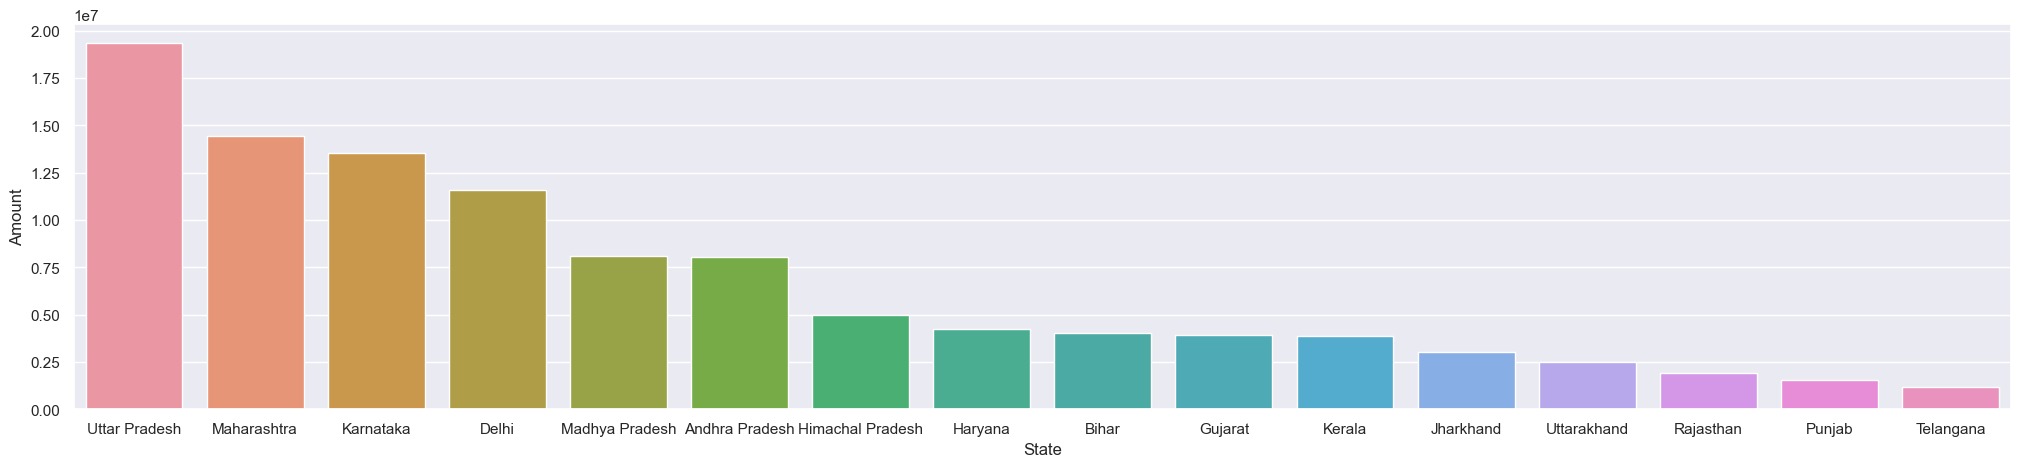

In [110]:
#Total sales/amount state wise
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

##### Most of the orders and sales are from Uttar Pradesh, Maharashtra and Karnataka

## Marital Status

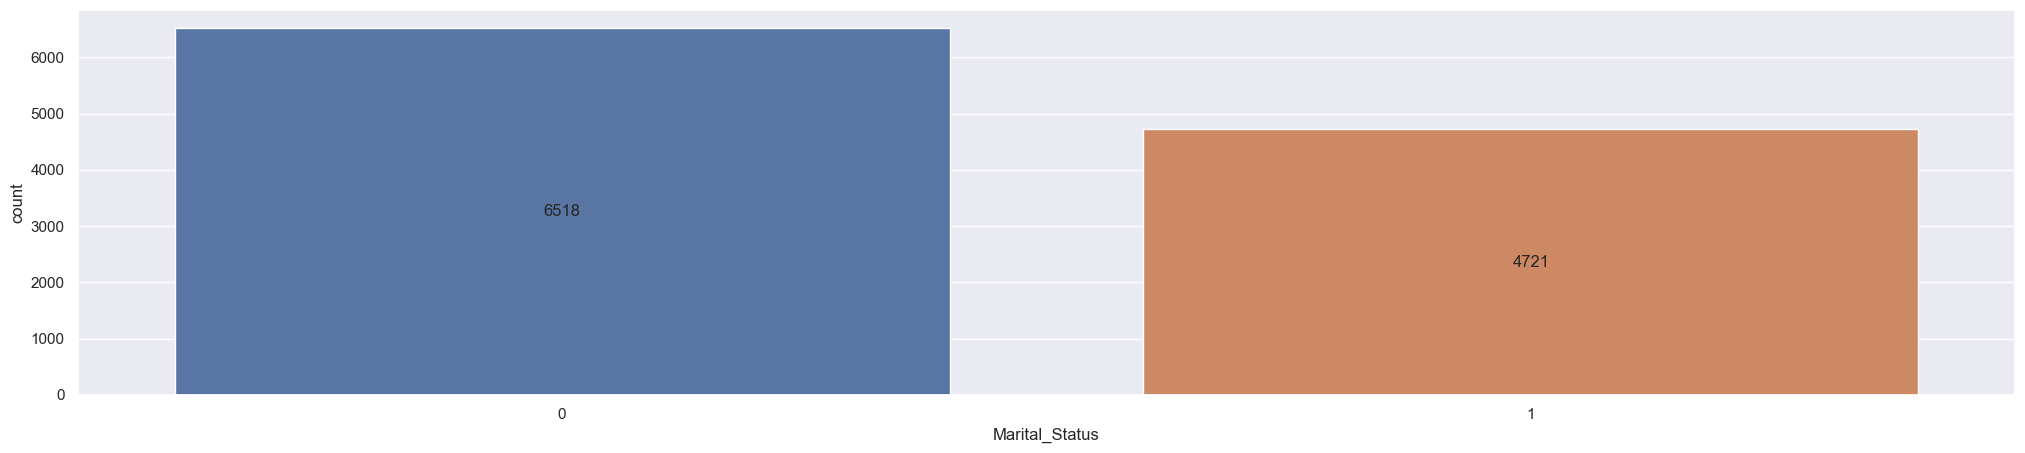

In [111]:
ax = sns.countplot(x = 'Marital_Status', data = df)

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

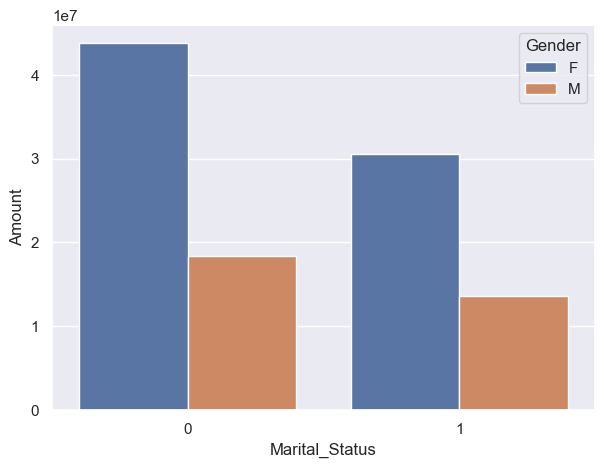

In [112]:
sales_mar = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_mar)

##### Married females have purchased more products

## Occupation

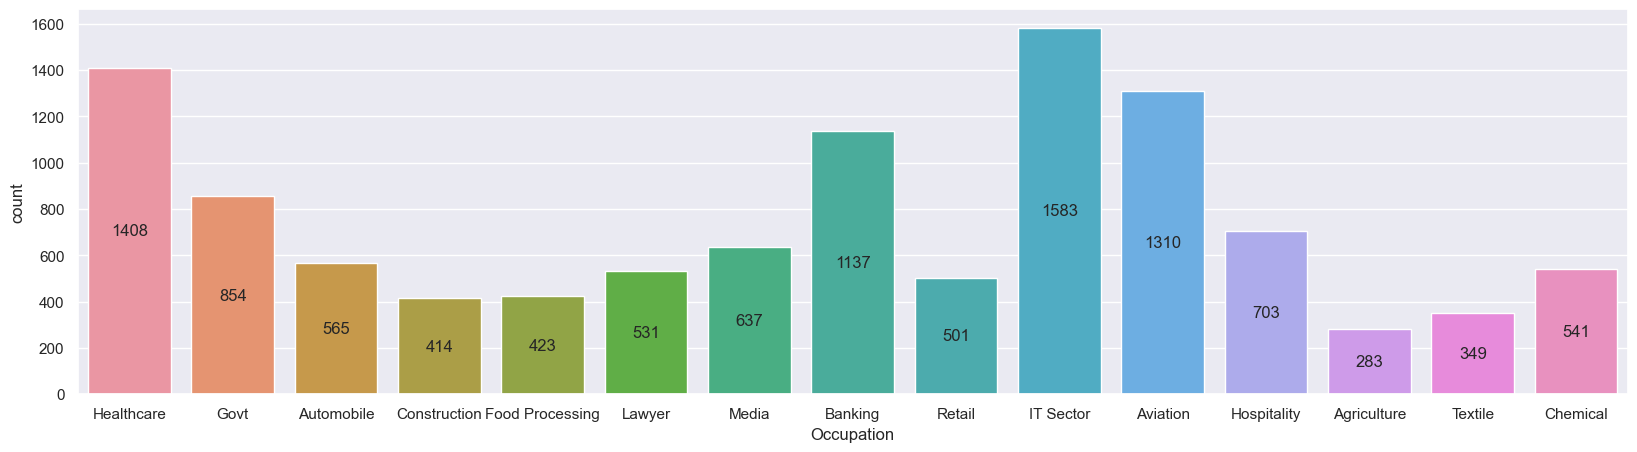

In [115]:
ax = sns.countplot(x = 'Occupation', data = df)

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

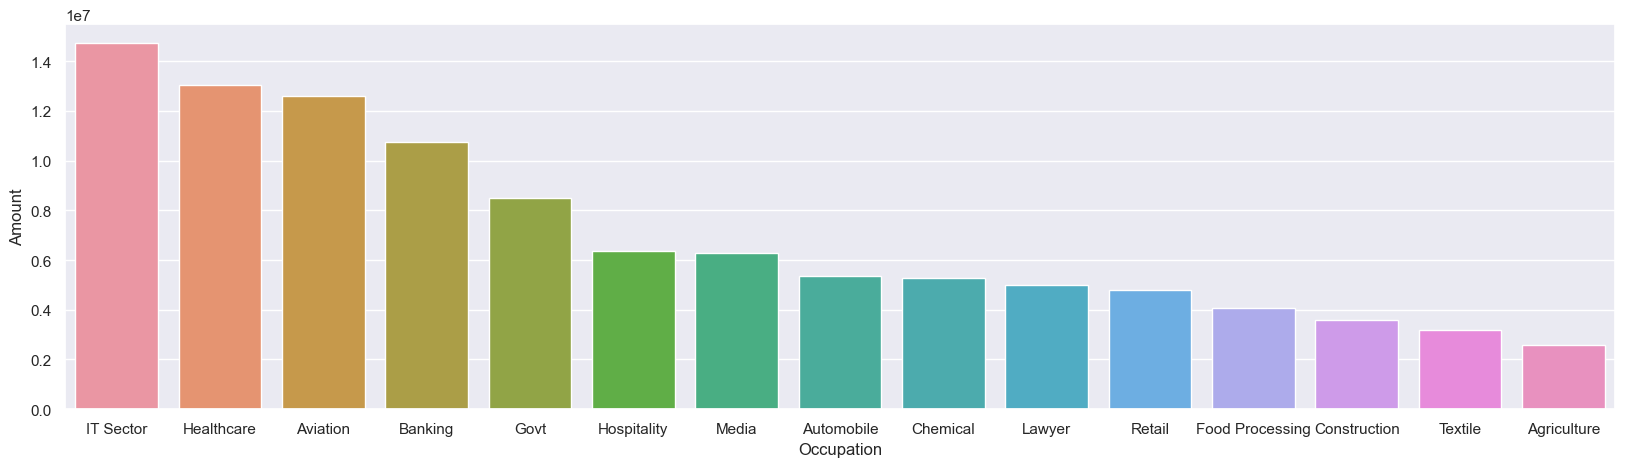

In [116]:
sales_mar = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Occupation', y = 'Amount', data = sales_mar)

##### Most of the buyers are working in IT, Healthcare and Aviation industry

## Product Category

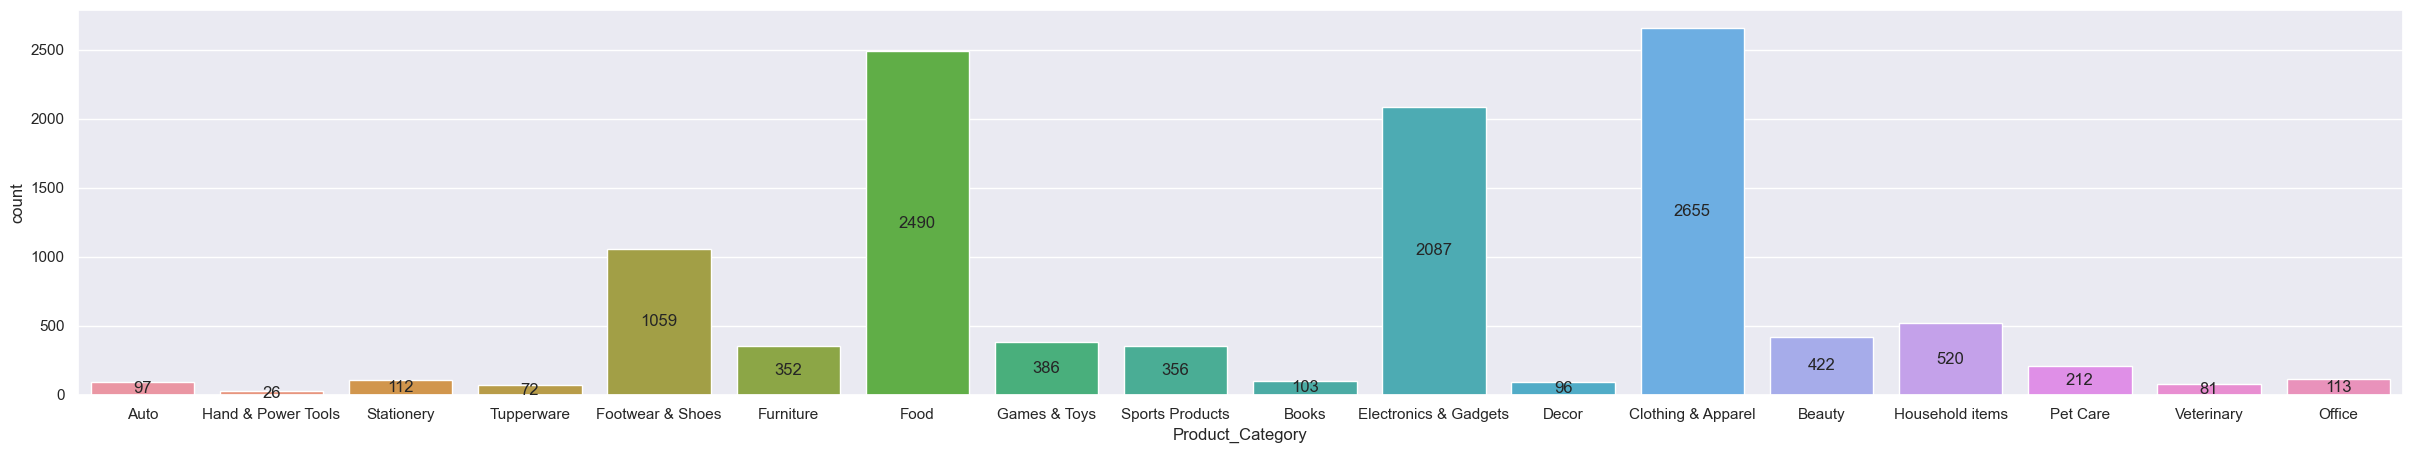

In [118]:
ax = sns.countplot(x = 'Product_Category', data = df)

sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

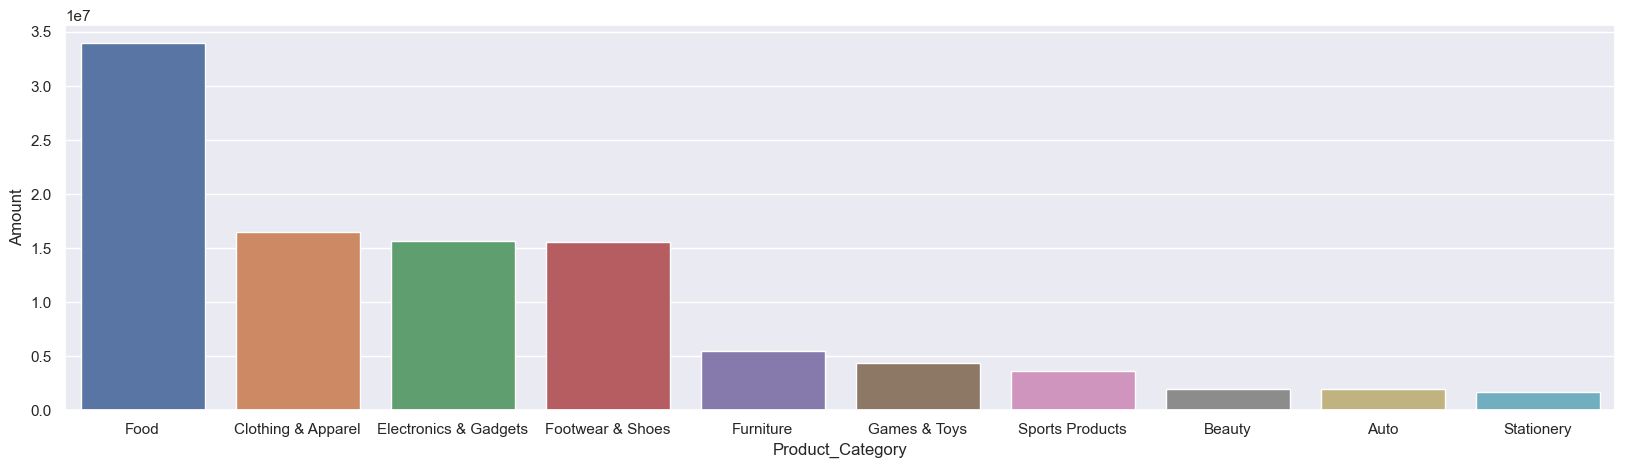

In [119]:
sales_prod = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_prod)

##### Most sold products are Clothing, Food and Electronic Gadgets 

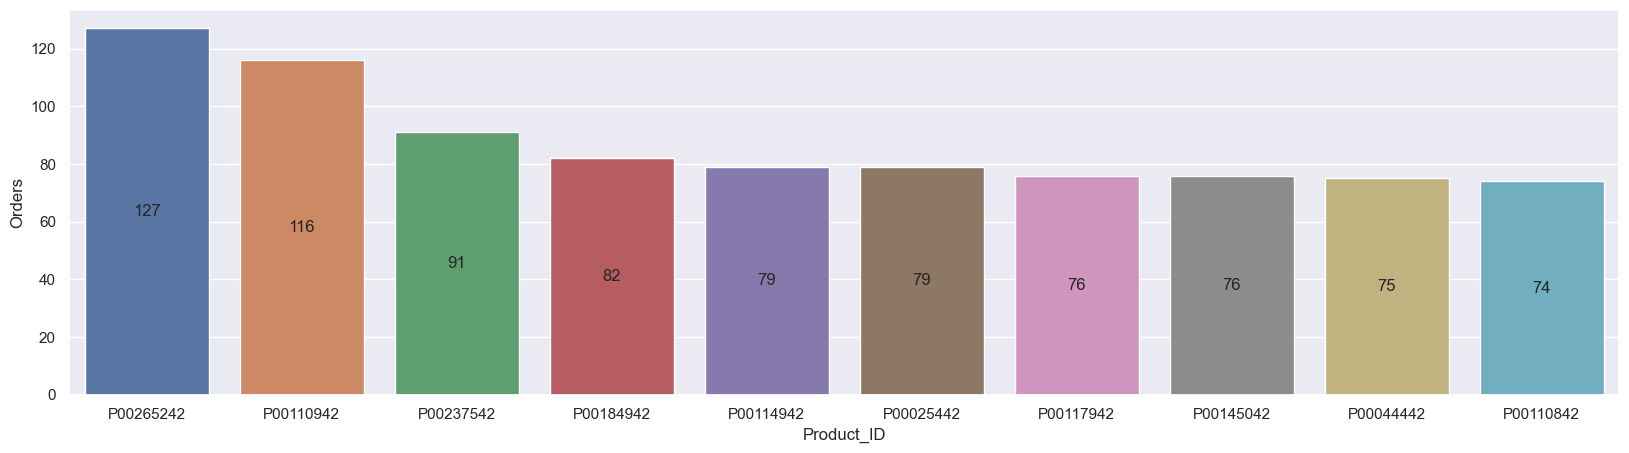

In [120]:
#Top 10 selling products
sales_prod = df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

ax = sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_prod)
for bars in ax.containers:
    ax.bar_label(bars,label_type='center')

## Conclusion:

##### 1. The data indicates that the majority of buyers are females, with a higher purchasing power compared to males. 
##### 2. The age group of 26 to 35 has the highest female buyer representation. 
##### 3. The states of Uttar Pradesh, Maharashtra, and Karnataka show the highest number of orders and sales. 
##### 4. Married females have made more purchases, and the top industries represented among buyers are IT, Healthcare, and Aviation. 
##### 5. The most popular product categories are Clothing, Food, and Electronic Gadgets.